In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import winsound

from matplotlib import pyplot as plt
from scipy import stats

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [2]:
class Analyzer():
    def get_error_metrics(self, target, prediction):
        mae = np.mean(np.absolute(prediction - target))
        r2 = r2_score(target, prediction)
        mape = np.dot(np.mean(np.absolute((target - prediction)/target)),100)
        return mae, r2, mape        

           Pysics     Science  Statistics        Math
count  450.000000  450.000000  450.000000  450.000000
mean    71.746667   72.662222   73.757778   74.586667
std     16.066061   14.333186   12.163017   11.476239
min      0.000000    0.000000   22.000000   22.000000
25%     66.000000   66.000000   67.000000   67.000000
50%     74.000000   74.000000   74.000000   74.000000
75%     82.000000   82.000000   83.000000   83.000000
max     99.000000   99.000000  100.000000   99.000000


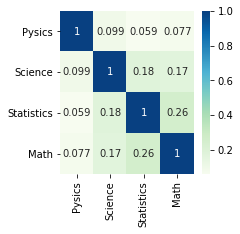

In [3]:
# # # lOAD DATA AND ANALYZE STATISTICS # # #
df_sources = pd.read_csv('Data.csv', sep=',')
df = df_sources

zscore = stats.zscore(df['Math'])
i = 0
for score in zscore:
    if score > 3 or score < -3:
        df=df.drop([i])
    i+=1

df.reset_index()

print(df_sources.describe())

plt.figure(figsize=(3,3))
correlations = df.corr()
top_correlations = correlations.index
sns.heatmap(df[top_correlations].corr(), annot=True, cmap='GnBu')


(0, 100)

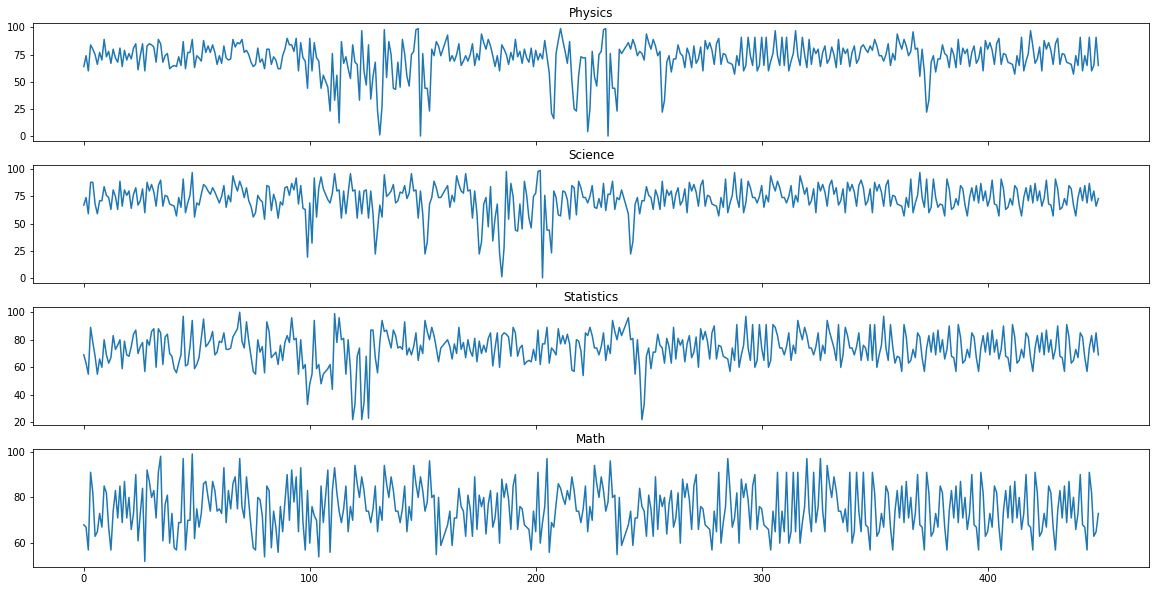

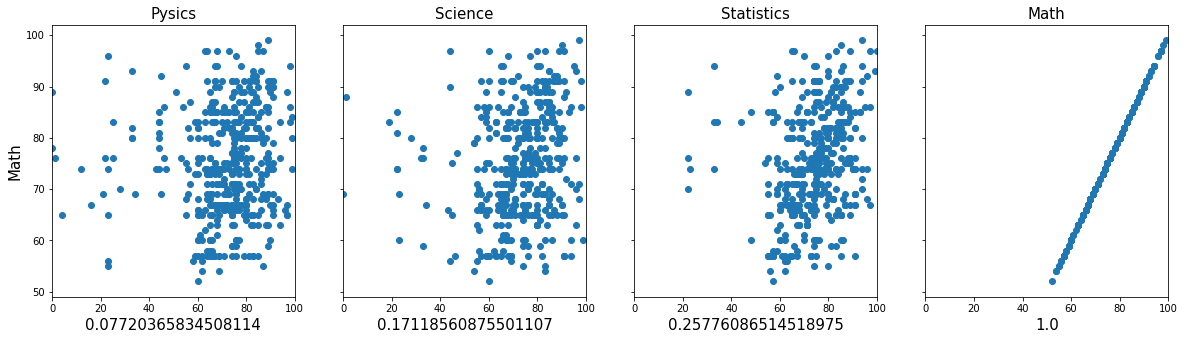

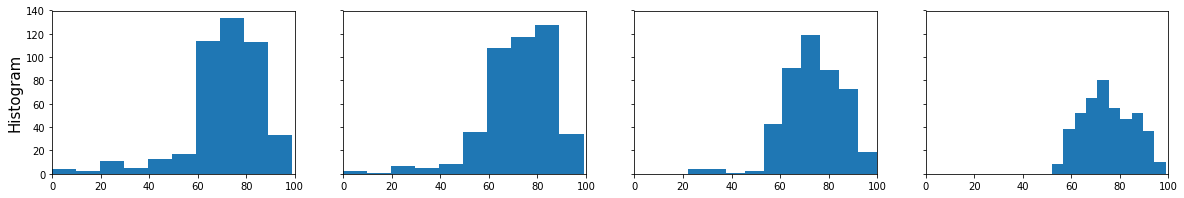

In [4]:
# # # PLOT DATA # # #

fig1, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20,10), sharex = True)
ax1.plot(df['Pysics'])
ax1.set_title('Physics')
ax2.plot(df['Science'])
ax2.set_title('Science')
ax3.plot(df['Statistics'])
ax3.set_title('Statistics')
ax4.plot(df['Math'])
ax4.set_title('Math')

fig2, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5), sharey = True)
ax1.scatter(df['Pysics'], df['Math'])
ax1.set_title('Pysics', fontsize=15)
ax1.set_ylabel('Math', fontsize=15)
ax1.set_xlabel(df.loc[:,['Pysics', 'Math']].corr().iloc[0,1], fontsize=15)
ax1.set_xlim([0, 100])
ax2.scatter(df['Science'], df['Math'])
ax2.set_title('Science', fontsize=15)
ax2.set_xlim([0, 100])
ax2.set_xlabel(df.loc[:,['Science', 'Math']].corr().iloc[0,1], fontsize=15)
ax3.scatter(df['Statistics'], df['Math'])
ax3.set_title('Statistics', fontsize=15)
ax3.set_xlim([0, 100])
ax3.set_xlabel(df.loc[:,['Statistics', 'Math']].corr().iloc[0,1], fontsize=15)
ax4.scatter(df['Math'], df['Math'])
ax4.set_title('Math', fontsize=15)
ax4.set_xlim([0, 100])
ax4.set_xlabel(df.loc[:,['Math', 'Math']].corr().iloc[0,1], fontsize=15)

fig3, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20,3), sharey = True)
nbins = 10
ax1.set_ylabel('Histogram', fontsize=15)
ax1.hist(df['Pysics'], bins = nbins)
ax1.set_xlim([0, 100])
ax2.hist(df['Science'], bins = nbins)
ax2.set_xlim([0, 100])
ax3.hist(df['Statistics'], bins = nbins)
ax3.set_xlim([0, 100])
ax4.hist(df['Math'], bins = nbins)
ax4.set_xlim([0, 100])

In [5]:
# # #    Regression # # #
data = df.loc[:,['Pysics', 'Science', 'Statistics']]
target = df['Math']

df_metrics = pd.DataFrame(data=[], index=['MAE', 'R2', 'MAPE'])
df_predictions = pd.DataFrame(data=[])
df_predictions['Target'] = target

cv=10

# Linear Regression
df_predictions['Linear Regression'] = cross_val_predict(
    ElasticNet(alpha=99, l1_ratio=0.01), data, target, cv=cv) 
df_metrics['Linear Regression'] = list(Analyzer().get_error_metrics(target, df_predictions['Linear Regression']))

# Decision Tree
df_predictions['Decision Tree'] = cross_val_predict(
    DecisionTreeRegressor(min_samples_leaf=88), data, target, cv=cv)
df_metrics['Decision Tree'] = list(Analyzer().get_error_metrics(target, df_predictions['Decision Tree']))

# Random Forest
df_predictions['Random Forest'] = cross_val_predict(
    RandomForestRegressor(n_estimators=10, min_samples_leaf=27), data, target, cv=cv)
df_metrics['Random Forest'] = list(Analyzer().get_error_metrics(target, df_predictions['Random Forest']))

# Ada Boost
df_predictions['Ada Boost'] = cross_val_predict(
    AdaBoostRegressor(n_estimators = 75, learning_rate=0.01, loss='square', ), data, target, cv=cv)
df_metrics['Ada Boost'] = list(Analyzer().get_error_metrics(target, df_predictions['Ada Boost']))

# KNN
df_predictions['KNN'] = cross_val_predict(
    KNeighborsRegressor(n_neighbors = 18, weights = 'distance', p = 3), data, target, cv=cv)
df_metrics['KNN'] = list(Analyzer().get_error_metrics(target, df_predictions['KNN']))

# SVM Regression
df_predictions['SVM Regression'] = cross_val_predict(
    SVR(kernel='rbf', gamma=0.01, C=11.8, epsilon=4.8, tol=0.7, ), data, target, cv=cv)
df_metrics['SVM Regression'] = list(Analyzer().get_error_metrics(target, df_predictions['SVM Regression']))

# Neural Network
df_predictions['Neural Network'] = cross_val_predict(
    MLPRegressor(hidden_layer_sizes = 100, activation='identity', solver='lbfgs', learning_rate='adaptive', max_iter = 1000), data, target, cv=cv)
df_metrics['Neural Network'] = list(Analyzer().get_error_metrics(target, df_predictions['Neural Network']))

In [6]:
df_metrics

,Linear Regression,Decision Tree,Random Forest,Ada Boost,KNN,SVM Regression,Neural Network
MAE,8.577715,7.912980,8.026715,8.111427,8.033242,8.043650,8.605474
R2,0.034157,0.132059,0.103573,0.098411,0.106767,0.085680,0.006387
MAPE,11.723078,10.805563,10.959417,11.053745,10.902106,10.941727,11.743693


In [9]:
# # #    REGRESSION WITH HIYPERPARAMETER   # # #
data = np.array(df.loc[:,['Pysics', 'Science', 'Statistics']])
target = np.array(df['Math'])

df_metrics = pd.DataFrame(data=[], index=['MAE', 'R2', 'MAPE'])
df_predictions = pd.DataFrame(data=[])
df_predictions['Target'] = target

cv=10

In [10]:
# Linear Regression
alpha = list(range(1,1000))
l1_ratio = list(np.arange(0.01, 0.99, 0.01))             
parameters = {'alpha':alpha, 'l1_ratio':l1_ratio}
lr = GridSearchCV(ElasticNet(), parameters, cv=cv)
lr.fit(data, target)
print(lr.best_params_)
winsound.Beep(440, 1000)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 137, 'l1_ratio': 0.01}


In [11]:
# Decision Tree
criterion = ('mse', 'friedman_mse', 'mae')
min_samples_leaf = list(range(20, 100, 1))
parameters = {'criterion':criterion, 'min_samples_leaf':min_samples_leaf}
tree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)
tree.fit(data, target)
print(tree.best_params_)
winsound.Beep(440, 1000)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mse', 'min_samples_leaf': 88}


In [12]:
# Random Forest
n_estimators = list(range(5, 50, 1))
min_samples_leaf = list(range(5, 100, 1))
parameters = {'n_estimators':n_estimators, 'min_samples_leaf':min_samples_leaf}
rf = GridSearchCV(RandomForestRegressor(), parameters, cv=cv)
rf.fit(data, target)
print(rf.best_params_)
winsound.Beep(440, 1000)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_leaf': 59, 'n_estimators': 6}


In [13]:
# Ada Boost
loss = ('linear', 'square', 'exponential')
n_estimators = list(range(50,100))
parameters = {'n_estimators':n_estimators, 'loss':loss}
adaboost = GridSearchCV(AdaBoostRegressor(learning_rate=0.01), parameters, cv=cv)
adaboost.fit(data, target)
print(adaboost.best_params_)
winsound.Beep(440, 1000)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'loss': 'linear', 'n_estimators': 83}


In [14]:
# KNN
n_neighbors = list(range(3,20,1))
weights = ('uniform', 'distance')
p = [1,2,3]
parameters = {'n_neighbors':n_neighbors, 'weights':weights, 'p':p}
knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=cv)
knn.fit(data, target)
print(knn.best_params_)
winsound.Beep(440, 1000)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 18, 'p': 3, 'weights': 'distance'}


In [ ]:
# SVM R
kernel = ('rbf', 'linear', 'poly', 'sigmoid')
degree = [2,3,4,5,6,7]
C = list(range(1,100,1))
epsilon = list(np.arange(0.1,10,0.5))
parameters = {'kernel':kernel, 'degree':degree, 'C':C, 'epsilon':epsilon}
svr = GridSearchCV(SVR(gamma = 'scale'), parameters, cv=cv)
svr.fit(data, target)
print(svr.best_params_)
winsound.Beep(440, 1000)

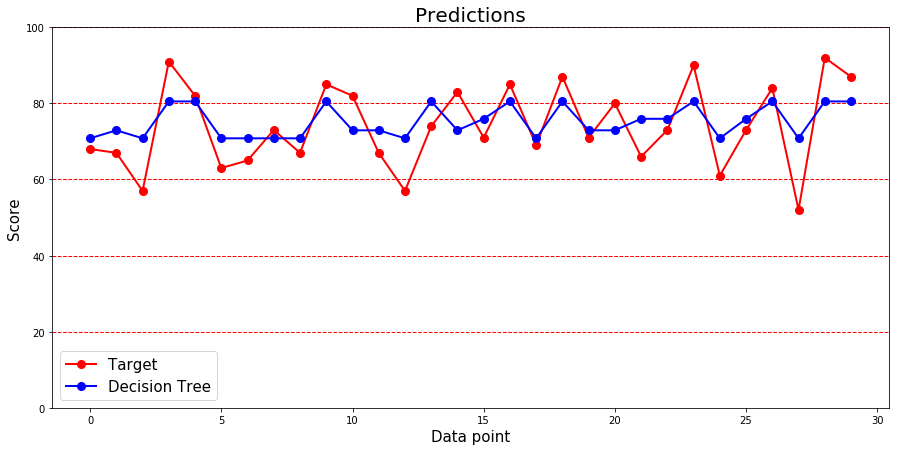

In [10]:
# # # VISUALIZE PREDICTIONS
df_predictions
legend = ['Target', 'Decision Tree', 'SVM', 'KNN', 'Ada Boost', 'Random Forest', 'Linear Regression', 'Neural Network']
ndata = 30

fig1, ax = plt.subplots(figsize=(15,7))
ax.plot(df_predictions[ 'Target'].head(ndata), '-o', linewidth=2, markersize=8, color='r')
ax.plot(df_predictions[ 'Decision Tree'].head(ndata), 'o-', linewidth=2, markersize=8, color='b')
# ax.plot(df_predictions[ 'SVM Regression'].head(ndata), '-+', linewidth=1)
# ax.plot(df_predictions[ 'KNN'].head(ndata), ':', linewidth=1)
# ax.plot(df_predictions[ 'Ada Boost'].head(ndata), 's-', linewidth=1)
# ax.plot(df_predictions[ 'Random Forest'].head(ndata), 'h-', linewidth=1)
# ax.plot(df_predictions[ 'Linear Regression'].head(ndata), '->', linewidth=1)
# ax.plot(df_predictions[ 'Neural Network'].head(ndata), '-*', linewidth=1)
ax.legend(legend, fontsize=15)
ax.set_ylim([0, 100])
# ax.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(True, which='major', axis='y',color='r', linestyle='--', linewidth=1)
ax.set_title('Predictions', fontsize=20)
ax.set_ylabel('Score', fontsize=15)
ax.set_xlabel('Data point', fontsize=15)
fig1.savefig('prediction.png')